In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_82fffc76a5544a46a57a300f319b6a07 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YvOHT_goz5vhGYGCEP7pVms0AlxTUr6ieDJ8yC5HD-H9',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_82fffc76a5544a46a57a300f319b6a07.get_object(Bucket='courseramilestone-donotdelete-pr-ggidc0qsglxicj',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Explore profiles
!pip install pandas-profiling

    100% |################################| 13.0MB 1.5MB/s eta 0:00:01
    100% |################################| 10.0MB 1.7MB/s eta 0:00:01
    100% |################################| 133kB 5.4MB/s eta 0:00:01
    100% |################################| 17.2MB 1.2MB/s eta 0:00:01
    100% |################################| 235kB 5.5MB/s eta 0:00:01
    100% |################################| 71kB 3.8MB/s eta 0:00:01
    100% |################################| 952kB 3.6MB/s eta 0:00:01
    100% |################################| 512kB 4.1MB/s eta 0:00:01
    100% |################################| 583kB 5.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
pyspark 2.3.0 requires py4j==0.10.6, which is not installed.


NameError: name 'df_data_1' is not defined

In [4]:
import pandas_profiling 
pandas_profiling.ProfileReport(df_data_1)

/home/spark/shared/user-libs/python3/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/spark/shared/user-libs/python3/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/spark/shared/user-libs/python3/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/spark/shared/user-libs/python3/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/spark/shared/user-libs/python3/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaV

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


No missing data: all zero values seem meaningful

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


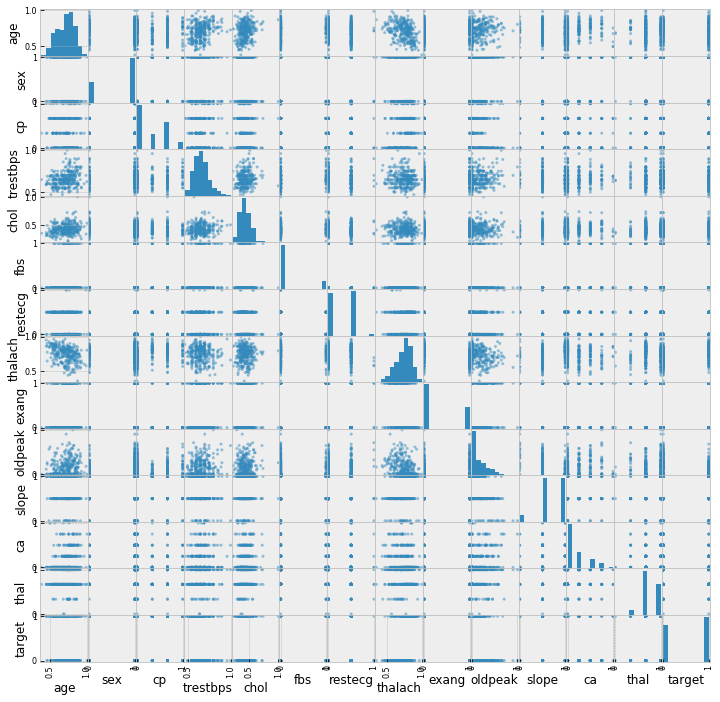

In [3]:
#Plot correlations

# get the column names of the concatenated DataFrame
cols = df_data_1.columns
# scale data to prepare for regression model 
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler() 
scaled_data = scaler.fit_transform(df_data_1)

# define a new DataFrame with the scaled data
dfScaled = pd.DataFrame(scaled_data,columns=cols)

#Plot the results and explore the correlations:

import matplotlib.pyplot as plt
%matplotlib inline
# import the scatter_matrix functionality
from pandas.tools.plotting import scatter_matrix

plt.style.use('bmh')
ff = scatter_matrix(dfScaled, diagonal='hist',figsize=(12,12))